In [1]:
import pandas as pd

In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

## Class I 

In [3]:
abelin_I_df = pd.read_csv('../data/abelin_classI/GO.txt', sep='\t')
abelin_I_df = abelin_I_df[abelin_I_df['NS']=='CC']

abelin_I_df['tissue'] = 'Abelin2017'
print(abelin_I_df.shape)

abelin_I_df.head(2)

(208, 12)


,# GO,NS,enrichment,name,ratio_in_study,ratio_in_pop,p_uncorrected,depth,study_count,p_fdr_bh,study_items,tissue
238,GO:0022624,CC,e,proteasome accessory complex,16/5914,17/19370,6.816294e-08,2,16,0.000106,"5700, 5701, 5702, 5704, 5705, 5706, 5707, 5708...",Abelin2017
239,GO:0071007,CC,e,U2-type catalytic step 2 spliceosome,26/5914,30/19370,2.505053e-07,5,26,0.000106,"988, 1659, 5356, 6627, 6629, 6632, 6633, 6634,...",Abelin2017


In [5]:
atlas_df = pd.read_csv('../data/HLA_ligand_atlas/HLA-I.GO.output.txt', sep='\t')
atlas_df = atlas_df[atlas_df['NS']=='CC']
atlas_df['tissue'] = atlas_df['tissue'].apply(lambda x: '{} (N)'.format(x))
print(len(atlas_df['tissue'].unique()))

print(atlas_df.shape)
atlas_df.head(2)

29
(6624, 12)


,# GO,NS,enrichment,name,ratio_in_study,ratio_in_pop,p_uncorrected,depth,study_count,p_fdr_bh,study_items,tissue
0,GO:0005839,CC,e,proteasome core complex,20/9025,20/19370,2.298601e-07,2,20,0.000114,"5682, 5683, 5684, 5685, 5686, 5687, 5688, 5689...",Thymus (N)
1,GO:0005844,CC,e,polysome,32/9025,35/19370,3.821333e-07,3,32,0.000114,"811, 1660, 1965, 1981, 2332, 2521, 3069, 4440,...",Thymus (N)


In [6]:
total = abelin_I_df.append(atlas_df)
print(total.shape)
total.head(2)

(6832, 12)


,# GO,NS,enrichment,name,ratio_in_study,ratio_in_pop,p_uncorrected,depth,study_count,p_fdr_bh,study_items,tissue
238,GO:0022624,CC,e,proteasome accessory complex,16/5914,17/19370,6.816294e-08,2,16,0.000106,"5700, 5701, 5702, 5704, 5705, 5706, 5707, 5708...",Abelin2017
239,GO:0071007,CC,e,U2-type catalytic step 2 spliceosome,26/5914,30/19370,2.505053e-07,5,26,0.000106,"988, 1659, 5356, 6627, 6629, 6632, 6633, 6634,...",Abelin2017


In [7]:
# save
savepath = '../data/generated_data/all_eluted.GO.class_i.txt'
print('Saving to {}'.format(savepath))
total.to_csv(savepath, sep='\t', index=False)

Saving to ../data/generated_data/all_eluted.GO.class_i.txt


In [8]:
total = pd.read_csv('../data/generated_data/all_eluted.GO.class_i.txt', sep='\t')
print(total.shape)
total.head(2)

(6832, 12)


,# GO,NS,enrichment,name,ratio_in_study,ratio_in_pop,p_uncorrected,depth,study_count,p_fdr_bh,study_items,tissue
0,GO:0022624,CC,e,proteasome accessory complex,16/5914,17/19370,6.816294e-08,2,16,0.000106,"5700, 5701, 5702, 5704, 5705, 5706, 5707, 5708...",Abelin2017
1,GO:0071007,CC,e,U2-type catalytic step 2 spliceosome,26/5914,30/19370,2.505053e-07,5,26,0.000106,"988, 1659, 5356, 6627, 6629, 6632, 6633, 6634,...",Abelin2017


##### enriched

In [9]:
e_df = total[total['enrichment']=='e']
print(e_df.shape)
most_freq = e_df['name'].value_counts()[e_df['name'].value_counts()>=30].index
print(len(most_freq))

(6475, 12)
19


In [10]:
savepath = '../data/generated_data/GO.class_i.enriched.total.tsv'
print(savepath)
e_df.to_csv(savepath, sep='\t', index=False)

../data/generated_data/GO.class_i.enriched.total.tsv


In [11]:
e_df = e_df[e_df['name'].isin(most_freq)]
e_df['ratio_in_pop'] = e_df['ratio_in_pop'].apply(lambda x: np.divide(*map(int, x.split('/'))))
e_df['ratio_in_study'] = e_df['ratio_in_study'].apply(lambda x: np.divide(*map(int, x.split('/'))))

e_df['diff_study-pop'] = e_df['ratio_in_study'] - e_df['ratio_in_pop']
e_df = e_df.sort_values(by=['diff_study-pop'], ascending=False)
print(e_df.shape)

(570, 13)


In [12]:
h = e_df.pivot(index='name', columns=['tissue'], values=['diff_study-pop'])
h.index = h.index.get_level_values(0)
h.columns = h.columns.get_level_values(1)

Saving to ../data/publication_figures/class_i.enriched_in_all_tissues.clustermap.pdf


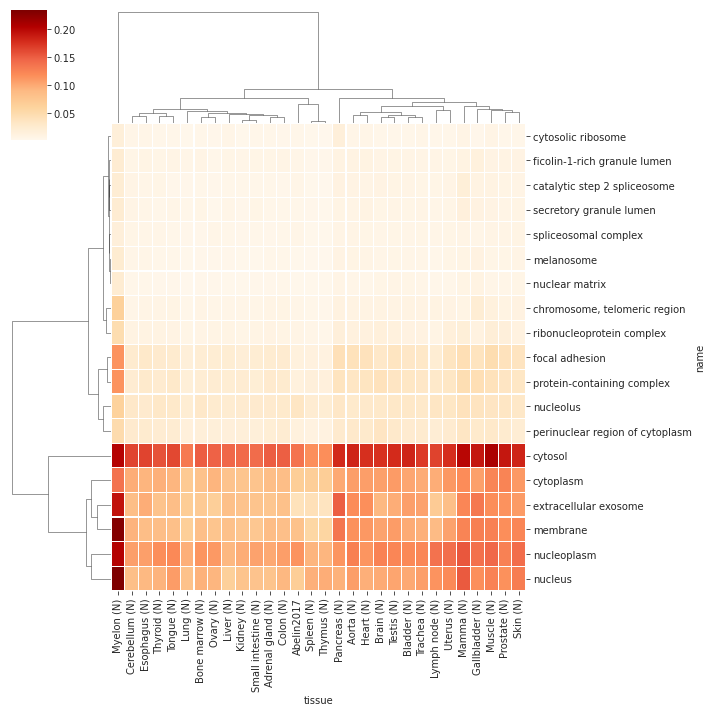

In [13]:
cm = sns.clustermap(h, lw=0.1, cmap='OrRd')
savepath = '../data/publication_figures/class_i.enriched_in_all_tissues.clustermap.pdf'
print('Saving to {}'.format(savepath))
cm.fig.savefig(savepath, bbox_inches='tight')

##### depleted

In [14]:
d_df = total[total['enrichment']=='p']
print(d_df.shape)

(357, 12)


In [15]:
savepath = '../data/generated_data/GO.class_i.depleted.total.tsv'
print(savepath)
d_df.to_csv(savepath, sep='\t', index=False)

../data/generated_data/GO.class_i.depleted.total.tsv


In [16]:
most_freq = d_df['name'].value_counts().index[:20]
print(len(most_freq))

20


In [17]:
d_df = d_df[d_df['name'].isin(most_freq)]
d_df['ratio_in_pop'] = d_df['ratio_in_pop'].apply(lambda x: np.divide(*map(int, x.split('/'))))
d_df['ratio_in_study'] = d_df['ratio_in_study'].apply(lambda x: np.divide(*map(int, x.split('/'))))

d_df['diff_study-pop'] = d_df['ratio_in_study'] - d_df['ratio_in_pop']
d_df = d_df.sort_values(by=['diff_study-pop'], ascending=False)
print(d_df.shape)

(297, 13)


In [18]:
h = d_df.pivot(index='name', columns=['tissue'], values=['diff_study-pop']).fillna(0)
h.index = h.index.get_level_values(0)
h.columns = h.columns.get_level_values(1)

Saving to ../data/publication_figures/class_i.depleted_in_all_tissues.clustermap.pdf


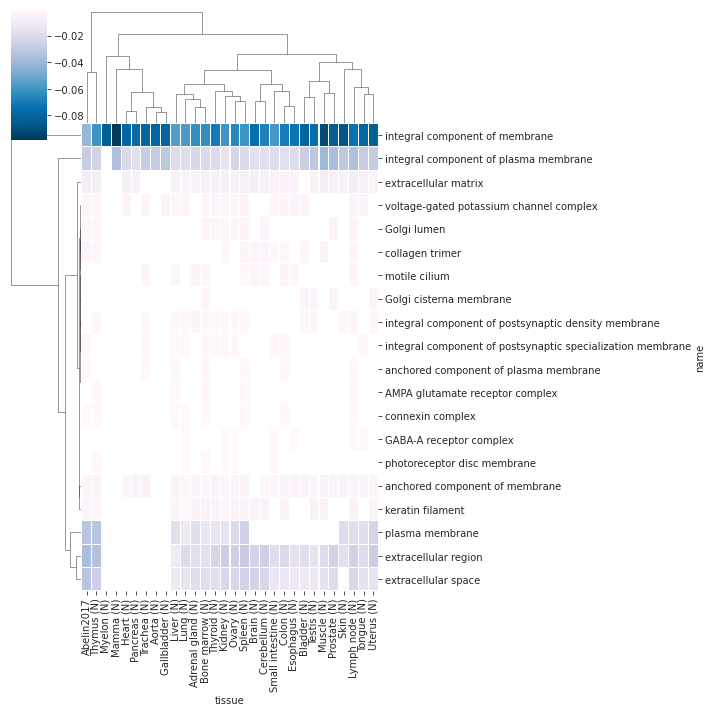

In [19]:
cm = sns.clustermap(h, lw=0.1, cmap='PuBu_r', mask=(h==0), )
savepath = '../data/publication_figures/class_i.depleted_in_all_tissues.clustermap.pdf'
print('Saving to {}'.format(savepath))
cm.fig.savefig(savepath, bbox_inches='tight')

## Class II

In [20]:
b_df = pd.DataFrame()
for f in os.listdir('../data/saghar_II/'):
    if f.startswith('GO.B'):
        temp = pd.read_csv('../data/saghar_II/{}'.format(f), sep='\t')
        temp['tissue'] = f.split('.')[2]
        b_df = b_df.append(temp)

hela_df = pd.read_csv('../data/saghar_II/GO.HeLa.output.txt', sep='\t')
hela_df['tissue'] = 'HeLa+INFg cells'

saghar_df = hela_df.append(b_df)
saghar_df = saghar_df[saghar_df['NS']=='CC']
print(saghar_df.shape)
saghar_df.head(2)

(378, 12)


,# GO,NS,enrichment,name,ratio_in_study,ratio_in_pop,p_uncorrected,depth,study_count,p_fdr_bh,study_items,tissue
21,GO:0043202,CC,e,lysosomal lumen,13/221,95/19370,1.322774e-07,6,13,0.000091,"338, 972, 1509, 1520, 2548, 2717, 3074, 3320, ...",HeLa+INFg cells
22,GO:0042470,CC,e,melanosome,18/221,100/19370,2.156326e-07,8,18,0.000091,"302, 476, 967, 1509, 2040, 3320, 5868, 5869, 5...",HeLa+INFg cells


In [21]:
abelin_II_df = pd.read_csv('../data/abelin_classII/GO.II.aggregated.output.txt', sep='\t')
abelin_II_df = abelin_II_df[abelin_II_df['category'].isin(['A375 Melanoma cells', 'Lung (N)', 'PBMC', 
                                                           'MAPTAC_class_II','K562+DC (phagocytosis)', 
                                                           'K562+DC (macropinocytosis)','Spleen (N)'])]
abelin_II_df['tissue'] = abelin_II_df['category']
abelin_II_df['tissue'] = abelin_II_df['tissue'].replace({'Lung (N)': 'Abelin2019 Lung (N)',
                                                         'Spleen (N)': 'Abelin2019 Spleen (N)'})
abelin_II_df = abelin_II_df[abelin_II_df['NS']=='CC']
print(abelin_II_df.shape)
abelin_II_df.head(2)

(866, 13)


,# GO,NS,enrichment,name,ratio_in_study,ratio_in_pop,p_uncorrected,depth,study_count,p_fdr_bh,study_items,category,tissue
166,GO:0005770,CC,e,late endosome,25/970,138/19370,3.565928e-07,8,25,0.000075,"1182, 3312, 3482, 3643, 3916, 3949, 4077, 5605...",A375 Melanoma cells,A375 Melanoma cells
167,GO:1903561,CC,e,extracellular vesicle,15/970,55/19370,3.612162e-07,5,15,0.000075,"476, 1293, 1303, 2771, 2782, 5270, 5315, 6386,...",A375 Melanoma cells,A375 Melanoma cells


In [23]:
atlas_II_df = pd.read_csv('../data/HLA_ligand_atlas/HLA-II.GO.output.txt', sep='\t')
atlas_II_df = atlas_II_df[atlas_II_df['NS']=='CC']
atlas_II_df['tissue'] = atlas_II_df['tissue'].apply(lambda x: '{} (N)'.format(x))

print(atlas_II_df.shape)
atlas_II_df.head(2)

(5972, 12)


,# GO,NS,enrichment,name,ratio_in_study,ratio_in_pop,p_uncorrected,depth,study_count,p_fdr_bh,study_items,tissue
0,GO:0034366,CC,e,spherical high-density lipoprotein particle,8/2307,8/19370,4.005852e-08,6,8,0.000037,"335, 336, 344, 345, 1191, 3250, 5444, 55937",Adrenal gland (N)
1,GO:0000276,CC,e,mitochondrial proton-transporting ATP synthase...,9/2307,10/19370,4.248359e-08,5,9,0.000037,"515, 516, 517, 518, 521, 522, 4509, 9551, 10632",Adrenal gland (N)


In [24]:
total_II = saghar_df.append(abelin_II_df).append(atlas_II_df)
print(total_II.shape)
total_II.head(2)

(7216, 13)


,# GO,NS,enrichment,name,ratio_in_study,ratio_in_pop,p_uncorrected,depth,study_count,p_fdr_bh,study_items,tissue,category
21,GO:0043202,CC,e,lysosomal lumen,13/221,95/19370,1.322774e-07,6,13,0.000091,"338, 972, 1509, 1520, 2548, 2717, 3074, 3320, ...",HeLa+INFg cells,NaN
22,GO:0042470,CC,e,melanosome,18/221,100/19370,2.156326e-07,8,18,0.000091,"302, 476, 967, 1509, 2040, 3320, 5868, 5869, 5...",HeLa+INFg cells,NaN


##### enriched

In [25]:
e_df = total_II[total_II['enrichment']=='e']
print(e_df.shape)

savepath = '../data/generated_data/GO.class_ii.enriched.total.tsv'
print(savepath)
e_df.to_csv(savepath, sep='\t', index=False)

(7057, 13)
../data/generated_data/GO.class_ii.enriched.total.tsv


In [26]:
most_freq = e_df['name'].value_counts()[e_df['name'].value_counts()>=37].index
print(len(most_freq))

35


In [27]:
e_df = e_df[e_df['name'].isin(most_freq)]
e_df['ratio_in_pop'] = e_df['ratio_in_pop'].apply(lambda x: np.divide(*map(int, x.split('/'))))
e_df['ratio_in_study'] = e_df['ratio_in_study'].apply(lambda x: np.divide(*map(int, x.split('/'))))

e_df['diff_study-pop'] = e_df['ratio_in_study'] - e_df['ratio_in_pop']
e_df = e_df.sort_values(by=['diff_study-pop'], ascending=False)

print(e_df.shape)

(1374, 14)


In [28]:
# take top 20 most enriched
top_enriched = e_df.drop_duplicates(subset=['name'])['name'].values[:20]
print(top_enriched)

e_df = e_df[e_df['name'].isin(top_enriched)]
e_df.shape

['extracellular exosome' 'extracellular space' 'extracellular region'
 'membrane' 'collagen-containing extracellular matrix' 'plasma membrane'
 'cytosol' 'blood microparticle' 'endoplasmic reticulum lumen'
 'focal adhesion' 'cell surface' 'lysosomal membrane'
 'endoplasmic reticulum' 'lysosome' 'perinuclear region of cytoplasm'
 'external side of plasma membrane' 'melanosome' 'endosome membrane'
 'membrane raft' 'ficolin-1-rich granule lumen']


(796, 14)

In [29]:
h = e_df.pivot(index='name', columns=['tissue'], values=['diff_study-pop']).fillna(0)
h.index = h.index.get_level_values(0)
h.columns = h.columns.get_level_values(1)

Saving to ../data/publication_figures/class_ii.enriched_in_all_tissues.top20enriched.clustermap.pdf


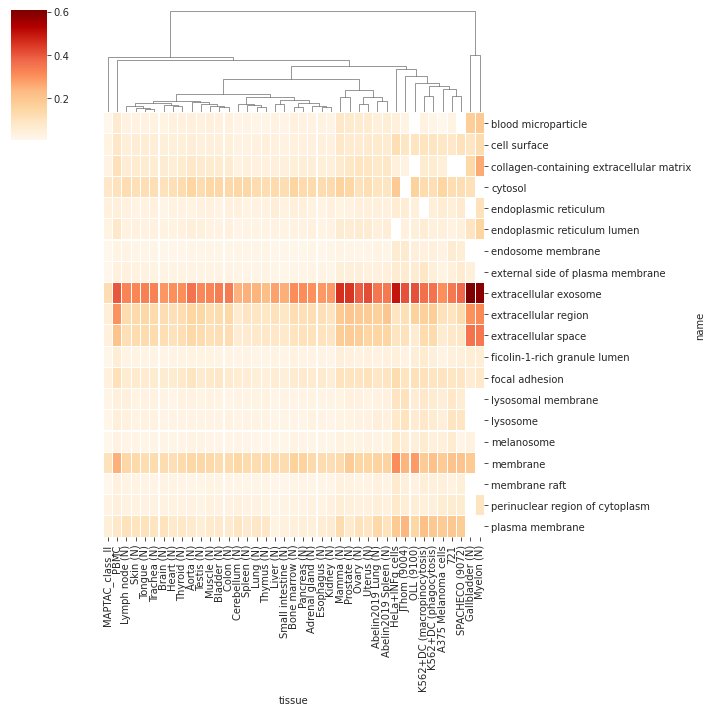

In [30]:
cm = sns.clustermap(h, lw=0.1, cmap='OrRd', mask=(h==0), xticklabels=True, row_cluster=False)
savepath = '../data/publication_figures/class_ii.enriched_in_all_tissues.top20enriched.clustermap.pdf'
print('Saving to {}'.format(savepath))
cm.fig.savefig(savepath, bbox_inches='tight')

##### depleted

In [31]:
d_df = total_II[total_II['enrichment']=='p']
print(d_df.shape)
savepath = '../data/generated_data/GO.class_ii.depleted.total.tsv'
print(savepath)
d_df.to_csv(savepath, sep='\t', index=False)

(159, 13)
../data/generated_data/GO.class_ii.depleted.total.tsv


In [32]:
most_freq = d_df['name'].value_counts().index[:20]
print(len(most_freq))

20


In [33]:
d_df = d_df[d_df['name'].isin(most_freq)]
d_df['ratio_in_pop'] = d_df['ratio_in_pop'].apply(lambda x: np.divide(*map(int, x.split('/'))))
d_df['ratio_in_study'] = d_df['ratio_in_study'].apply(lambda x: np.divide(*map(int, x.split('/'))))

d_df['diff_study-pop'] = d_df['ratio_in_study'] - d_df['ratio_in_pop']
d_df = d_df.sort_values(by=['diff_study-pop'], ascending=False)
print(d_df.shape)

(157, 14)


In [34]:
h = d_df.pivot(index='name', columns=['tissue'], values=['diff_study-pop']).fillna(0)
h.index = h.index.get_level_values(0)
h.columns = h.columns.get_level_values(1)

Saving to ../data/publication_figures/class_ii.depleted_in_all_tissues.top20depleted.clustermap.pdf


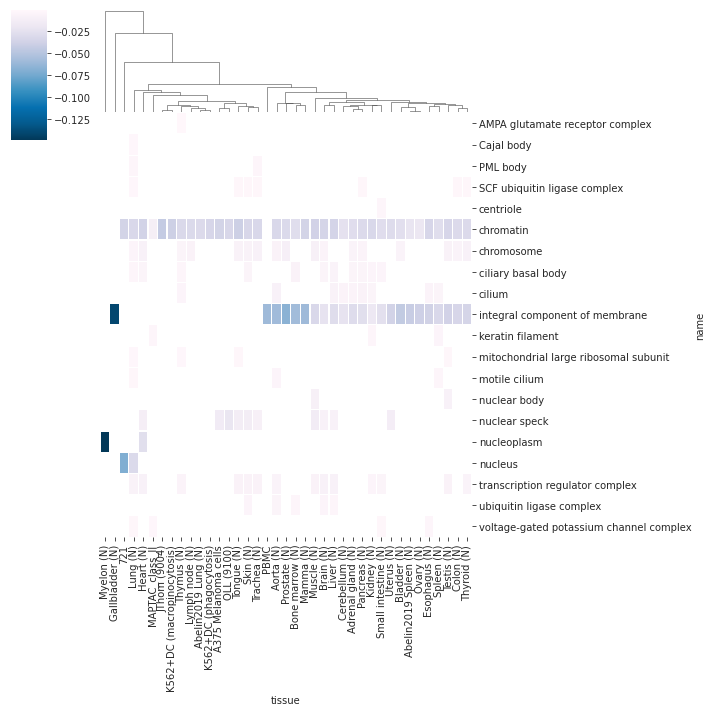

In [35]:
cm = sns.clustermap(h, lw=0.1, cmap='PuBu_r', mask=(h==0), xticklabels=True, row_cluster=False)
savepath = '../data/publication_figures/class_ii.depleted_in_all_tissues.top20depleted.clustermap.pdf'
print('Saving to {}'.format(savepath))
cm.fig.savefig(savepath, bbox_inches='tight')

## Thymus figure
- What locations are enriched or depleted in the thymus?

In [36]:
thymus_I = total[total['tissue']=='Thymus (N)']
thymus_I['class'] = 'MHC-I'
print(thymus_I.shape)
thymus_I.head(2)

(223, 13)


/cellar/users/andreabc/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,# GO,NS,enrichment,name,ratio_in_study,ratio_in_pop,p_uncorrected,depth,study_count,p_fdr_bh,study_items,tissue,class
208,GO:0005839,CC,e,proteasome core complex,20/9025,20/19370,2.298601e-07,2,20,0.000114,"5682, 5683, 5684, 5685, 5686, 5687, 5688, 5689...",Thymus (N),MHC-I
209,GO:0005844,CC,e,polysome,32/9025,35/19370,3.821333e-07,3,32,0.000114,"811, 1660, 1965, 1981, 2332, 2521, 3069, 4440,...",Thymus (N),MHC-I


In [37]:
thymus_II = total_II[total_II['tissue']=='Thymus (N)']
thymus_II['class'] = 'MHC-II'
print(thymus_II.shape)
thymus_II.head(2)

(274, 14)


/cellar/users/andreabc/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,# GO,NS,enrichment,name,ratio_in_study,ratio_in_pop,p_uncorrected,depth,study_count,p_fdr_bh,study_items,tissue,category,class
4424,GO:0071682,CC,e,endocytic vesicle lumen,16/3720,18/19370,1.268965e-07,5,16,0.000047,"335, 338, 348, 811, 1514, 3039, 3040, 3043, 32...",Thymus (N),NaN,MHC-II
4425,GO:0034364,CC,e,high-density lipoprotein particle,16/3720,23/19370,2.043833e-07,5,16,0.000047,"319, 335, 336, 337, 338, 341, 348, 350, 5360, ...",Thymus (N),NaN,MHC-II


In [38]:
thymus_df = thymus_I.append(thymus_II)
print(thymus_df.shape)
thymus_df.head(2)

(497, 14)


,# GO,NS,enrichment,name,ratio_in_study,ratio_in_pop,p_uncorrected,depth,study_count,p_fdr_bh,study_items,tissue,class,category
208,GO:0005839,CC,e,proteasome core complex,20/9025,20/19370,2.298601e-07,2,20,0.000114,"5682, 5683, 5684, 5685, 5686, 5687, 5688, 5689...",Thymus (N),MHC-I,NaN
209,GO:0005844,CC,e,polysome,32/9025,35/19370,3.821333e-07,3,32,0.000114,"811, 1660, 1965, 1981, 2332, 2521, 3069, 4440,...",Thymus (N),MHC-I,NaN


In [39]:
thymus_df['ratio_in_pop'] = thymus_df['ratio_in_pop'].apply(lambda x: np.divide(*map(int, x.split('/'))))
thymus_df['ratio_in_study'] = thymus_df['ratio_in_study'].apply(lambda x: np.divide(*map(int, x.split('/'))))

thymus_df['diff_study-pop'] = thymus_df['ratio_in_study'] - thymus_df['ratio_in_pop']
thymus_df['abs_diff'] = thymus_df['diff_study-pop'].apply(abs)

thymus_df = thymus_df.sort_values(by=['abs_diff'], ascending=False)

In [40]:
thymus_df[thymus_df['enrichment']=='p']

,# GO,NS,enrichment,name,ratio_in_study,ratio_in_pop,p_uncorrected,depth,study_count,p_fdr_bh,study_items,tissue,class,category,diff_study-pop,abs_diff
416,GO:0016021,CC,p,integral component of membrane,0.120222,0.180692,0.000012,3,1085,0.000244,"20, 21, 53, 102, 109, 111, 113, 225, 241, 267,...",Thymus (N),MHC-I,NaN,-0.060470,0.060470
415,GO:0005576,CC,p,extracellular region,0.061274,0.094992,0.000010,2,553,0.000209,"2, 26, 43, 47, 81, 87, 88, 123, 165, 176, 178,...",Thymus (N),MHC-I,NaN,-0.033718,0.033718
417,GO:0005886,CC,p,plasma membrane,0.198116,0.230718,0.000013,3,1788,0.000256,"14, 19, 20, 21, 26, 43, 47, 60, 71, 86, 87, 88...",Thymus (N),MHC-I,NaN,-0.032601,0.032601
4691,GO:0000785,CC,p,chromatin,0.018817,0.050490,0.000004,2,70,0.000078,"60, 824, 1051, 1108, 1387, 1879, 3005, 3007, 3...",Thymus (N),MHC-II,NaN,-0.031673,0.031673
413,GO:0005615,CC,p,extracellular space,0.050637,0.077026,0.000008,2,457,0.000189,"2, 21, 26, 43, 58, 59, 60, 70, 71, 72, 81, 87,...",Thymus (N),MHC-I,NaN,-0.026389,0.026389
414,GO:0005887,CC,p,integral component of plasma membrane,0.047756,0.072277,0.000008,4,431,0.000191,"19, 24, 90, 94, 101, 107, 108, 109, 111, 112, ...",Thymus (N),MHC-I,NaN,-0.024520,0.024520
411,GO:0031012,CC,p,extracellular matrix,0.005762,0.012648,0.000003,3,52,0.000114,"176, 348, 633, 1116, 1278, 1284, 1287, 1293, 1...",Thymus (N),MHC-I,NaN,-0.006887,0.006887
4692,GO:0005667,CC,p,transcription regulator complex,0.004570,0.010170,0.000054,2,17,0.000758,"142, 328, 1387, 1499, 1602, 2547, 5591, 8804, ...",Thymus (N),MHC-II,NaN,-0.005600,0.005600
4693,GO:0005694,CC,p,chromosome,0.005376,0.010222,0.000727,5,20,0.007157,"2091, 2271, 2332, 4691, 5058, 8243, 8815, 8888...",Thymus (N),MHC-II,NaN,-0.004846,0.004846
4695,GO:0005929,CC,p,cilium,0.006452,0.010842,0.003484,4,24,0.026555,"156, 867, 1452, 2847, 3842, 4853, 5082, 5156, ...",Thymus (N),MHC-II,NaN,-0.004390,0.004390


../data/publication_figures/Supplementary.thymus.clustermap.pdf


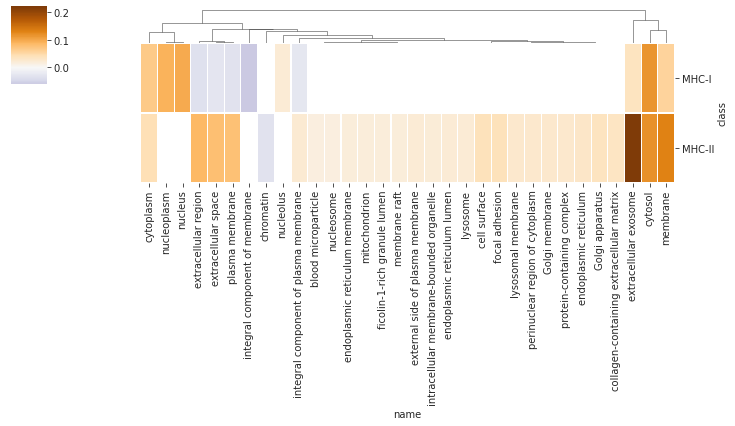

In [41]:
h = thymus_df.iloc[:40].pivot(index='class', columns='name', values='diff_study-pop').fillna(0)
cm = sns.clustermap(h, lw=0.1, cmap='PuOr_r', figsize=(10,6), mask=(h==0), row_cluster=False, center=0)
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

savepath = '../data/publication_figures/Supplementary.thymus.clustermap.pdf'
print(savepath)
plt.savefig(savepath, bbox_inches='tight')